## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston (или Fashion_Mnist). 

### Решение: это я сделал

  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

###  Решение: функцию потерь и метрику я поменял. Я не понял что означает "Постройте 10-15 вариантов...". Надо было посроить 10-15 комбинаций различных метрик?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).
   
###  Решение:

1. tf.experimental.numpy . Это позволяет запускать код NumPy, ускоренный TensorFlow, а также предоставляет доступ ко всем API TensorFlow. Можно ускорять numpy процессы.

2. tf.experimental.numpy . Это позволяет запускать код NumPy, ускоренный TensorFlow, а также предоставляет доступ ко всем API TensorFlow.

3. 



  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>

In [230]:
import tensorflow as tf 
import numpy as np
import pandas as pd 

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.preprocessing import normalize

from tensorflow.keras.datasets import boston_housing

In [231]:
boston=keras.datasets.boston_housing.load_data()
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [232]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [233]:
x_train[0] #данные не нормализованные

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [234]:
x_train = normalize(x_train, axis=0, norm='max') #используем функцию нормализации из sklearn
x_test = normalize(x_test, axis=0, norm='max')

In [235]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_train.min()
max_y = y_train.max() - min_y #"опустим" максимум на min_y
y_train = (y_train - min_y) / max_y #отклонение от минимума к амплитуде
y_test = (y_test - min_y) / max_y

In [236]:
model = Sequential() #строим модель
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

In [237]:
print(model.summary()) # архитектура нашей модели

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 256)               3584      
_________________________________________________________________
dense_65 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_66 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_67 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_68 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 65        
Total params: 53,121
Trainable params: 53,121
Non-trainable params: 0
_________________________________________________

In [238]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [239]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=300, 
                    validation_split=0.2, 
                    verbose=2)

Epoch 1/300
11/11 - 0s - loss: 0.0325 - mae: 0.1286 - val_loss: 0.0486 - val_mae: 0.1486
Epoch 2/300
11/11 - 0s - loss: 0.0246 - mae: 0.1066 - val_loss: 0.0260 - val_mae: 0.0982
Epoch 3/300
11/11 - 0s - loss: 0.0191 - mae: 0.0962 - val_loss: 0.0246 - val_mae: 0.0992
Epoch 4/300
11/11 - 0s - loss: 0.0181 - mae: 0.0956 - val_loss: 0.0147 - val_mae: 0.0807
Epoch 5/300
11/11 - 0s - loss: 0.0127 - mae: 0.0818 - val_loss: 0.0128 - val_mae: 0.0758
Epoch 6/300
11/11 - 0s - loss: 0.0139 - mae: 0.0818 - val_loss: 0.0122 - val_mae: 0.0848
Epoch 7/300
11/11 - 0s - loss: 0.0157 - mae: 0.0881 - val_loss: 0.0101 - val_mae: 0.0729
Epoch 8/300
11/11 - 0s - loss: 0.0083 - mae: 0.0658 - val_loss: 0.0085 - val_mae: 0.0690
Epoch 9/300
11/11 - 0s - loss: 0.0115 - mae: 0.0776 - val_loss: 0.0167 - val_mae: 0.0840
Epoch 10/300
11/11 - 0s - loss: 0.0114 - mae: 0.0740 - val_loss: 0.0107 - val_mae: 0.0728
Epoch 11/300
11/11 - 0s - loss: 0.0088 - mae: 0.0644 - val_loss: 0.0273 - val_mae: 0.1217
Epoch 12/300
11/11 

In [240]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test).flatten() 
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
y_test = y_test * max_y + min_y

In [241]:
# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

3.5284930995866373


In [242]:
# Средняя цена по выборке
print(np.mean(y_test))

23.07843137254902


In [243]:
# Сравнение предсказания и правильного ответа
for i in range(len(pred)):
  print("Сеть сказала: ", round(pred[i],2), ", а верный ответ: ", round(y_test[i],2), ", разница: ", round(pred[i] - y_test[i],2))

Сеть сказала:  13.99 , а верный ответ:  7.2 , разница:  6.79
Сеть сказала:  20.09 , а верный ответ:  18.8 , разница:  1.29
Сеть сказала:  21.31 , а верный ответ:  19.0 , разница:  2.31
Сеть сказала:  23.71 , а верный ответ:  27.0 , разница:  -3.29
Сеть сказала:  22.79 , а верный ответ:  22.2 , разница:  0.59
Сеть сказала:  21.75 , а верный ответ:  24.5 , разница:  -2.75
Сеть сказала:  29.99 , а верный ответ:  31.2 , разница:  -1.21
Сеть сказала:  22.25 , а верный ответ:  22.9 , разница:  -0.65
Сеть сказала:  18.17 , а верный ответ:  20.5 , разница:  -2.33
Сеть сказала:  18.91 , а верный ответ:  23.2 , разница:  -4.29
Сеть сказала:  22.11 , а верный ответ:  18.6 , разница:  3.51
Сеть сказала:  19.03 , а верный ответ:  14.5 , разница:  4.53
Сеть сказала:  16.36 , а верный ответ:  17.8 , разница:  -1.44
Сеть сказала:  39.52 , а верный ответ:  50.0 , разница:  -10.48
Сеть сказала:  14.07 , а верный ответ:  20.8 , разница:  -6.73
Сеть сказала:  21.6 , а верный ответ:  24.3 , разница:  -2.7


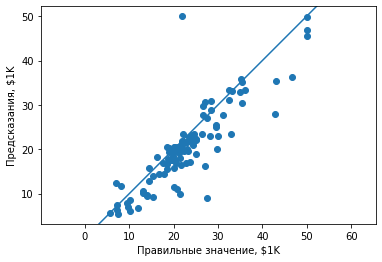

In [205]:
import matplotlib.pyplot as plt

# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

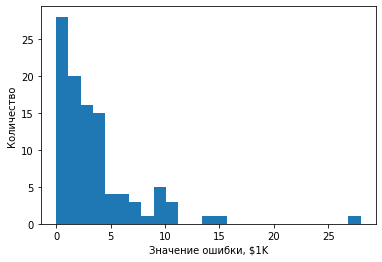

In [244]:
#Разность предсказанного и правильного ответа
error = pred - y_test
#Построение гистограммы
plt.hist(abs(error), bins = 25)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()

In [207]:
# Видно, что большая часть ошибок укладывается в диапазон примерно до 4000$, несколько вариантов в районе 15 тыс., и единственный аномальный вариант — с ошибкой в районе 27 тыс. 
# Всё, что выше 15 000 - этовыбросы, с которыми необходимо было работать до начала моделирования.

